In [1]:
%matplotlib nbagg
import cocoex
import numpy as np
import os
import sys
os.chdir('C:/Users/dimo/Desktop/code-mo-test/comocma/')
sys.path.insert(0, '.')
import como
from cocoex import default_observers 
from matplotlib import pyplot as plt
import functools


In [29]:
np.random.seed(124)
mysuite = cocoex.Suite('bbob-biobj', '', '')
dimension = 2
fun = mysuite.get_problem_by_function_dimension_instance(1, dimension, 3)
observer_name = default_observers()['bbob-biobj']
observer = cocoex.Observer(observer_name, '')
observer.observe(fun)
max_evals = 4e2 * dimension

In [30]:
x0 = fun.initial_solution
fx0 = fun(x0)
num_kernels = 1  # number of single-objective solvers (population size)
sigma0 = 2

list_of_solvers = como.get_cmas(fun.dimension*[3], #-5 + 10 * np.random.rand(num_kernels, fun.dimension),
                                sigma0,  # inopts=cmaopts
                                {'tolx': 10 ** -4, 
                                 'tolfunrel': 1e+1,
                                 #'tolfunrel': 1e+1,
                                 'maxiter': 1e9,
                                 'seed': 1003}
                                )  # produce `num_kernels cma instances`
my_random_restart_function = functools.partial(como.random_restart_kernel, 
                                            x0_fct=lambda n: n*[3],
                                            opts={'seed':1003}
                                            )

moes = como.Sofomore(list_of_solvers, opts={'archive': False,
                                     #'restart': como.random_restart_kernel,
                                     'restart': my_random_restart_function,
                                     #'restart': como.best_chv_restart_kernel,
                                     #'restart': como.best_chv_or_random_restart_kernel,
                                     'continue_stopped_kernel': False,
                                     'random_restart_on_domination': False},
reference_point = fun.largest_fvalues_of_interest)  # create a como-cma-es instance
while fun.evaluations < max_evals:
    solutions = moes.ask()
    objective_values = [list(fun(x)) for x in solutions]
    moes.tell(solutions, objective_values)
    #print(str(fun.evaluations) + ' evaluations:') 
    moes.disp()
    #open('onlyrandom-countevals-3e4.tmp', 'w').write(repr([k.countevals for k in moes.kernels]))
    open('onlyrandom-countiters.tmp', 'w').write(repr([k.countiter for k in moes.kernels]))
    #open('onlyrandom-idsofrestarts.tmp', 'w').write(repr(moes._previous_kernel_ids_on_restart))
    #open('onlyrandom-bestchvsatrestart.tmp', 'w').write(repr(moes._bestchv_on_restart))
    #open('onlyrandom-seedsatrestart.tmp', 'w').write(repr(moes._seeds_at_restart))
    #open('onlyrandom-meansatrestart.tmp', 'w').write(repr(moes._meansAtRestart))
    

Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1      7 0.000000000000000e+00 1.0e+00 1.94e+00  2e+00  2e+00
    2     14 5.761899577857053e+01 1.0e+00 1.95e+00  2e+00  2e+00
    3     22 0.000000000000000e+00 1.0e+00 1.92e+00  2e+00  2e+00
  100    749 5.761899577857053e+01 1.1e+00 1.90e+00  2e+00  2e+00


<IPython.core.display.Javascript object>


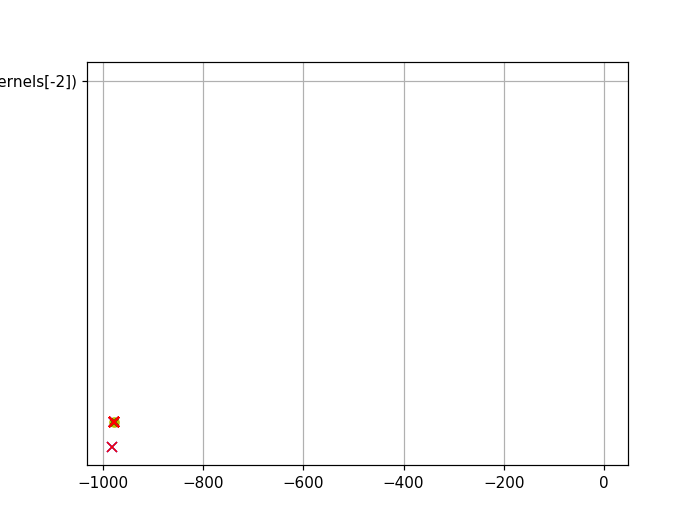

[]


In [31]:
plt.figure(76565523)
objvectors = np.array([k.objective_values for k in moes.kernels if k.objective_values])
domobjvectors = np.array([k.objective_values for k in moes.kernels if k.objective_values not in moes.pareto_front and k.objective_values])
print(moes.pareto_front)
lastkernel = moes.kernels[-2]
plt.plot(lastkernel.objective_values[0], lastkernel.objective_values[1], 'oy', 'repeated final mean (moes.kernels[-2])')
plt.plot(objvectors[:,0], objvectors[:,1], 'xb')
if len(domobjvectors) > 1:
    plt.plot(domobjvectors[:,0], domobjvectors[:,1], 'xr')

#front = np.array(moes.pareto_front)
#plt.plot(front[:,0], front[:,1], 'y.')

plt.grid(which='both')
#plt.text(-997, -38, str(len(moes.kernels)) + ' kernels in total\nof which ' + str(len(moes.pareto_front)) + ' different vectors on the Pareto front')


In [ ]:
objs = [tuple(k.objective_values) for k in moes]
print(len(objs))
print(len(set(objs)))

In [6]:
[k.objective_values for k in moes if k.objective_values not in moes.pareto_front]

[]

In [ ]:
len(set(objs))

In [25]:
plt.plot(np.array(moes.pareto_front)[:,0], np.array(moes.pareto_front)[:,1], '.r')

In [20]:
solutions = moes.ask()
print(len(solutions))
print(solutions)
objective_values = [list(fun(x)) for x in solutions]
print(objective_values)
moes.tell(solutions, objective_values)


7
[array([2.07803779, 3.15585931]), array([5.13050241, 2.40257776]), array([1.99918291, 3.76386473]), array([0.5632258 , 1.50602554]), array([-0.75437555,  0.94655539]), array([2.39166675, 4.40539724]), array([-1.83702801,  2.54676704])]
[[-986.7843139432191, -42.06129449557224], [-968.1552132260167, -36.66087643756549], [-983.1879555570983, -40.71185678331925], [-997.957017702931, -37.768300245235466], [-999.024569525163, -29.234733354585323], [-976.4560241829329, -38.92859042873162], [-991.524916774908, -22.90634131977372]]


In [21]:
solutions = moes.ask()
print(len(solutions))
print(solutions)
objective_values = [list(fun(x)) for x in solutions]
print(objective_values)
moes.tell(solutions, objective_values)


7
[array([0.30083626, 1.5238026 ]), array([3.41643692, 4.48514078]), array([-0.60669181,  3.20406773]), array([5.76724419, 1.16929271]), array([4.55309744, 2.316955  ]), array([4.30103857, 4.34579366]), array([-6.77759232e+00, -5.82789589e-03])]
[[-998.1782864729854, -36.64581826678721], [-969.674048228716, -38.05079293521568], [-990.8622355149062, -31.802169331653612], [-964.9611155924798, -31.49292889708005], [-974.2003166724995, -39.20030377701546], [-963.8783048147391, -36.43597843403297], [-955.0447068042757, 51.57510835153544]]


In [22]:
solutions = moes.ask()
print(len(solutions))
print(solutions)
objective_values = [list(fun(x)) for x in solutions]
print(objective_values)
moes.tell(solutions, objective_values)


8
[array([4., 4.]), array([1.17699243, 3.05204153]), array([6.16380709, 3.89654236]), array([1.21009004, 2.92521554]), array([3.15590238, 4.98481515]), array([2.70618009, 6.90896395]), array([5.1472629 , 2.50313996]), array([3.17559379, 3.85197818])]
[[-969.15171776, -38.557064319999995], [-990.4527940018799, -40.39019737241042], [-947.5966200354259, -28.273021925828534], [-991.0689423634986, -40.6278768819699], [-966.9223449931916, -36.08496866715663], [-947.6197425719917, -22.808407278978788], [-967.5329050302691, -36.571709462778934], [-976.2887167498542, -40.575382027527716]]


In [37]:
solutions = moes.ask()
print(len(solutions))
print(solutions)
objective_values = [list(fun(x)) for x in solutions]
print(objective_values)
moes.tell(solutions, objective_values)


7
[array([2.07803779, 3.15585931]), array([5.13050241, 2.40257776]), array([1.99918291, 3.76386473]), array([0.5632258 , 1.50602554]), array([-0.75437555,  0.94655539]), array([2.39166675, 4.40539724]), array([-1.83702801,  2.54676704])]
[[-986.7843139432191, -42.06129449557224], [-968.1552132260167, -36.66087643756549], [-983.1879555570983, -40.71185678331925], [-997.957017702931, -37.768300245235466], [-999.024569525163, -29.234733354585323], [-976.4560241829329, -38.92859042873162], [-991.524916774908, -22.90634131977372]]


In [41]:
solutions = moes.ask()
print(len(solutions))
print(solutions)
objective_values = [list(fun(x)) for x in solutions]
print(objective_values)
moes.tell(solutions, objective_values)


7
[array([0.30083626, 1.5238026 ]), array([3.41643692, 4.48514078]), array([-0.60669181,  3.20406773]), array([5.76724419, 1.16929271]), array([4.55309744, 2.316955  ]), array([4.30103857, 4.34579366]), array([-6.77759232e+00, -5.82789589e-03])]
[[-998.1782864729854, -36.64581826678721], [-969.674048228716, -38.05079293521568], [-990.8622355149062, -31.802169331653612], [-964.9611155924798, -31.49292889708005], [-974.2003166724995, -39.20030377701546], [-963.8783048147391, -36.43597843403297], [-955.0447068042757, 51.57510835153544]]


In [49]:
print([k.objective_values for k in moes.kernels if k.objective_values is not None])

[[-996.2124739168158, -40.51030091414785], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737241042], [-990.4527940018799, -40.39019737

<IPython.core.display.Javascript object>


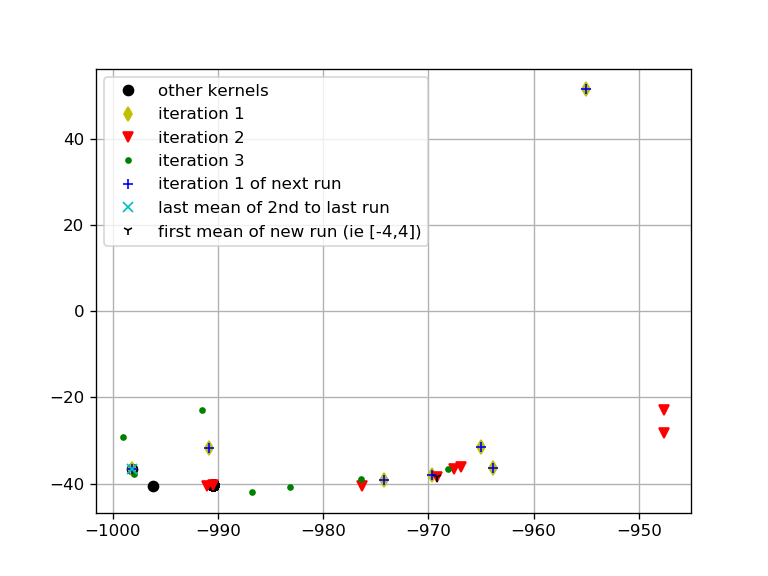

[-969.15171776  -38.55706432]


In [71]:
plt.figure(123456)

kernels = np.array([k.objective_values for k in moes.kernels if k.objective_values is not None])
plt.plot(kernels[:,0], kernels[:,1], 'ok', label='other kernels')
s = np.array([[-998.1782864729854, -36.64581826678721], [-969.674048228716, -38.05079293521568], [-990.8622355149062, -31.802169331653612], [-964.9611155924798, -31.49292889708005], [-974.2003166724995, -39.20030377701546], [-963.8783048147391, -36.43597843403297], [-955.0447068042757, 51.57510835153544]])
plt.plot(s[:,0], s[:,1], 'dy', label="iteration 1")
s = np.array([[-969.15171776, -38.557064319999995], [-990.4527940018799, -40.39019737241042], [-947.5966200354259, -28.273021925828534], [-991.0689423634986, -40.6278768819699], [-966.9223449931916, -36.08496866715663], [-947.6197425719917, -22.808407278978788], [-967.5329050302691, -36.571709462778934], [-976.2887167498542, -40.575382027527716]])
plt.plot(s[:,0], s[:,1], 'vr', label="iteration 2")
s = np.array([[-986.7843139432191, -42.06129449557224], [-968.1552132260167, -36.66087643756549], [-983.1879555570983, -40.71185678331925], [-997.957017702931, -37.768300245235466], [-999.024569525163, -29.234733354585323], [-976.4560241829329, -38.92859042873162], [-991.524916774908, -22.90634131977372]])
plt.plot(s[:,0], s[:,1], '.g', label="iteration 3")
s = np.array([[-998.1782864729854, -36.64581826678721], [-969.674048228716, -38.05079293521568], [-990.8622355149062, -31.802169331653612], [-964.9611155924798, -31.49292889708005], [-974.2003166724995, -39.20030377701546], [-963.8783048147391, -36.43597843403297], [-955.0447068042757, 51.57510835153544]])
plt.plot(s[:,0], s[:,1], '+b', label="iteration 1 of next run")
seclast = moes.kernels[-2].objective_values
last = fun(moes.kernels[-1].incumbent)
print(last)
plt.plot(seclast[0], seclast[1], 'xc', label='last mean of 2nd to last run')
plt.plot(last[0], last[1], '1k', label='first mean of new run (ie [-4,4])')

plt.grid(True)
plt.legend()


In [66]:
set([tuple(k.objective_values) for k in moes.pareto_front if k.objective_values is not None])

AttributeError: 'list' object has no attribute 'objective_values'

In [67]:
moes.pareto_front

[[-998.1782864729854, -36.64581826678721],
 [-996.2124739168158, -40.51030091414785]]

In [69]:
fun([4,4])

array([-969.15171776,  -38.55706432])

In [83]:
plt.plot(np.array(moes.archive)[:,0], np.array(moes.archive)[:,1], '.k')

In [17]:
moes.pareto_front

[[-993.3181414205728, -41.2043357487017]]